In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def music(CovMat,NA,NS,d,w,Angles,scale="log",corr=None):
    if corr!=None:
        J = np.flip(np.eye(M), axis=1)
        CovMat = CovMat + np.dot(J, np.dot(CovMat.conj(), J))
    n, V = np.linalg.eig(CovMat)
    G = V[:, NS:NA]
    numAngles = Angles.size
    pspectrum = np.zeros(numAngles)
    e = np.zeros((M, len(theta))) * 1j
    for i in range(M):
        e[i, :] = np.exp(-2j * np.pi * d * np.sin(Angles) * i / w)
    for i in range(numAngles):
        pspectrum[i] = 1 / np.linalg.norm((G.conj().transpose() @ e[:,i]))
    if scale=="log":
        pspectrum = 10 * np.log10(pspectrum / pspectrum.max())
    return pspectrum

In [ ]:
def generate_data(M,N,w,d,wavelen,var=0.01):
    D = np.zeros((M, w.size)) * 1j
    xx = np.zeros((w.size, N)) * 1j
    for i in range(M):
        D[i, :] = np.exp(-2j * np.pi * d * np.sin(doa) * i / wavelen)
    for i in range(N):
        xx[:, i] = 2 * np.exp(1j * w * i)
    x = np.dot(D, xx)
    noise = np.random.normal(0, var, x.shape)
    return x+noise


In [ ]:
def plot(psin,theta,sp=None,title="Music"):
    if sp!=None:
        plt.subplot(sp)
    plt.plot(theta, psin)
    plt.title(title)
    for i in doa:
        plt.plot((i, i), (psin.min(), psin.max()), 'r')

In [ ]:
doa = np.array([20, 60, 75, 80]) * np.pi / 180
N = 200
w = np.array([ 1 / 5, 1 / 5,  1 / 3, 1/3]) * np.pi
M = 10
P = w.size
wavelen = 150
d = wavelen / 2
snr = 20
var = 0.01

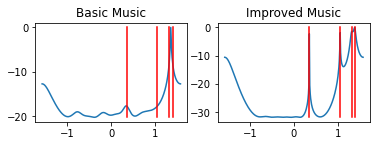

In [ ]:
y = generate_data(M,N,w,d,wavelen,var)
theta = np.arange(-np.pi / 2, np.pi / 2, 0.01)
CovMat=np.dot(y, np.transpose(np.conj(y)))
psin1= music(CovMat, M, P, d,wavelen, theta)
psin2= music(CovMat, M, P, d, wavelen, theta, corr=1)

# plot
plot(psin1,theta,221,"Basic Music")
plot(psin2,theta,222,"Improved Music")
plt.show()